<a href="https://colab.research.google.com/github/tourbut/MedicalAI/blob/main/01_CNN/CNN_02.ipynb" target="_parent">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
#MLP 모델 vs CNN 모델 vs Resnet
!git clone https://github.com/tourbut/MedicalAI
%cd MedicalAI
%cd 01_CNN

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow.keras import layers, Sequential, Input,Model
from tensorflow.keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt

In [3]:
#랜덤값 일치시키기
SEED = 2021

In [4]:
def load_cifar10_dataset():
    train_X = np.load("./dataset/cifar10_train_X.npy")
    train_y = np.load("./dataset/cifar10_train_y.npy")
    test_X = np.load("./dataset/cifar10_test_X.npy")
    test_y = np.load("./dataset/cifar10_test_y.npy")
    
    train_X, test_X = train_X / 255.0, test_X / 255.0
    
    return train_X, train_y, test_X, test_y

In [5]:
def build_mlp_model(img_shape, num_classes=10):
    model = Sequential()

    model.add(Input(shape=img_shape))
    # TODO: [지시사항 1번] 모델을 완성하세요.
    model.add(layers.Flatten())

    model.add(layers.Dense(4096, activation="relu"))
    model.add(layers.Dense(1024, activation="relu"))
    model.add(layers.Dense(256, activation="relu"))
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dense(num_classes, activation="softmax"))
    model._name ='MLP'
    return model

In [6]:
def build_cnn_model(img_shape, num_classes=10):
    model = Sequential()

    # TODO: [지시사항 2번] CNN 모델을 완성하세요.
    model.add(layers.Conv2D(16, kernel_size=(3,3),padding="same", input_shape=(img_shape),activation = "relu"))
    model.add(layers.Conv2D(32, kernel_size=(3,3),padding="same",activation = "relu"))
    model.add(layers.MaxPool2D(pool_size = 2))
    model.add(layers.Conv2D(64, kernel_size=(3,3),padding="same",strides=(2,2), activation="relu"))
    model.add(layers.Conv2D(64, kernel_size=(3,3),padding="same",strides=(2,2), activation="relu"))
    model.add(layers.MaxPool2D(pool_size = 2))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation="relu"))
    model.add(layers.Dense(num_classes, activation="softmax"))
    model._name ='CNN'
    return model

In [7]:
def plot_history(hist, name):
    train_loss = hist.history["loss"]
    train_acc = hist.history["accuracy"]
    valid_loss = hist.history["val_loss"]
    valid_acc = hist.history["val_accuracy"]
    
    fig = plt.figure(figsize=(8, 6))
    plt.plot(train_loss)
    plt.plot(valid_loss)
    plt.title(name+'_Loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Train', 'Valid'], loc='upper right')
    
    fig = plt.figure(figsize=(8, 6))
    plt.plot(train_acc)
    plt.plot(valid_acc)
    plt.title(name+'_Accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['Train', 'Valid'], loc='upper left')

In [8]:
def run_model(model, train_X, train_y, test_X, test_y, epochs=10):
    # TODO: [지시사항 3번] Adam optimizer를 설정하세요.
    optimizer = Adam(learning_rate=0.001)
    
    model.summary()
    # TODO: [지시사항 4번] 모델의 optimizer, 손실 함수, 평가 지표를 설정하세요.
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy",metrics=["accuracy"])
    
    # TODO: [지시사항 5번] 모델 학습을 위한 hyperparameter를 설정하세요.
    hist = model.fit(train_X, train_y, epochs=epochs, batch_size=64, validation_split=0.2, shuffle=True, verbose=2)
    
    plot_history(hist,model.name)
    test_loss, test_acc = model.evaluate(test_X, test_y)
    print("Test Loss: {:.5f}, Test Accuracy: {:.3f}%".format(test_loss, test_acc * 100))
    
    return optimizer, hist

In [9]:
tf.random.set_seed(SEED)
np.random.seed(SEED)

train_X, train_y, test_X, test_y = load_cifar10_dataset()

============================== MLP 모델 ==============================
Model: "MLP"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 4096)              12587008  
                                                                 
 dense_1 (Dense)             (None, 1024)              4195328   
                                                                 
 dense_2 (Dense)             (None, 256)               262400    
                                                                 
 dense_3 (Dense)             (None, 64)                16448     
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                            

(<keras.optimizer_v2.adam.Adam at 0x7ffa7816a0a0>,
 <keras.callbacks.History at 0x7ffa77000550>)

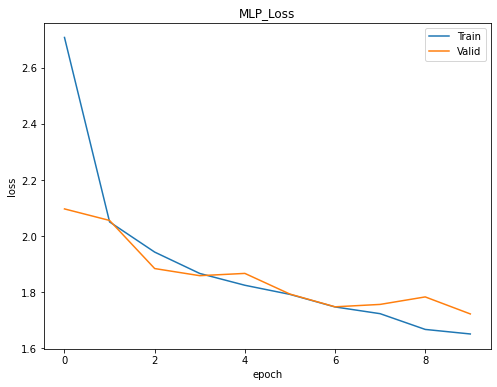

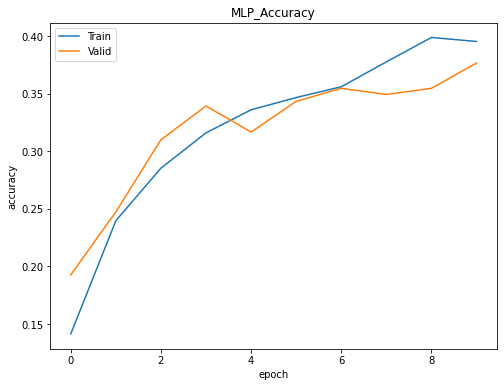

In [10]:
print("=" * 30, "MLP 모델", "=" * 30)
img_shape = train_X[0].shape
mlp_model = build_mlp_model(img_shape)
run_model(mlp_model, train_X, train_y, test_X, test_y)

============================== CNN 모델 ==============================
Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 64)         0    

(<keras.optimizer_v2.adam.Adam at 0x7ffa6804e610>,
 <keras.callbacks.History at 0x7ffa507f0e80>)

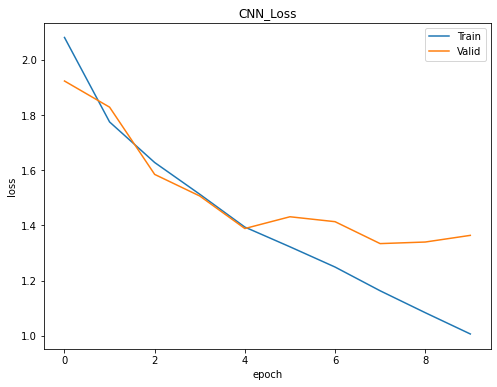

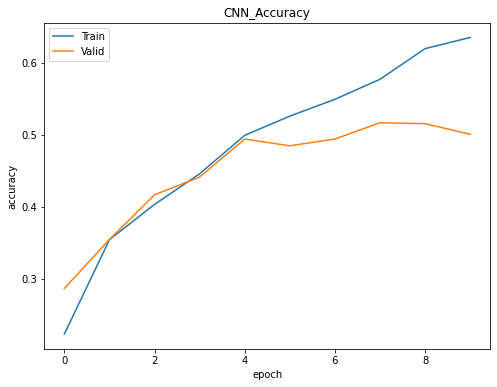

In [11]:
print("=" * 30, "CNN 모델", "=" * 30)
img_shape = train_X[0].shape
cnn_model = build_cnn_model(img_shape)
run_model(cnn_model, train_X, train_y, test_X, test_y)

In [34]:
#RESNET 구현
class ResidualBlock(Model):
    def __init__(self, num_kernels, kernel_size):
        super(ResidualBlock, self).__init__()

        # TODO: [지시사항 1번] 2개의 Conv2D Layer를 지시사항에 따라 추가하세요.
        self.conv1 = layers.Conv2D(num_kernels,kernel_size=kernel_size,padding='same',activation='relu')
        self.conv2 = layers.Conv2D(num_kernels,kernel_size=kernel_size,padding='same',activation='relu')
        
        self.relu = layers.Activation("relu")
        
        # TODO: [지시사항 1번] Add Layer를 추가하세요.
        self.add = layers.Add()

    def call(self, input_tensor):
        x = self.conv1(input_tensor)
        x = self.conv2(x)

        x = self.add([x, input_tensor]) # 두 값을 더하는 과정
        x = self.relu(x)
        
        return x
        
def build_resnet(input_shape, num_classes=10):
    model = Sequential()
    
    model.add(layers.Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu", input_shape=input_shape))
    model.add(layers.MaxPool2D(2))
    
    model.add(ResidualBlock(64, (3, 3)))
    model.add(ResidualBlock(64, (3, 3)))
    model.add(ResidualBlock(64, (3, 3)))
    
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(num_classes, activation="softmax"))
    
    model._name ='RESNET'
    return model

============================== RESNET 모델 ==============================
Model: "RESNET"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 residual_block_6 (ResidualB  (None, 16, 16, 64)       73856     
 lock)                                                           
                                                                 
 residual_block_7 (ResidualB  (None, 16, 16, 64)       73856     
 lock)                                                           
                                                                 
 residual_block_8 (ResidualB  (None, 16, 16, 64)      

(<keras.optimizer_v2.adam.Adam at 0x7f06d44576a0>,
 <keras.callbacks.History at 0x7f06d446a1f0>)

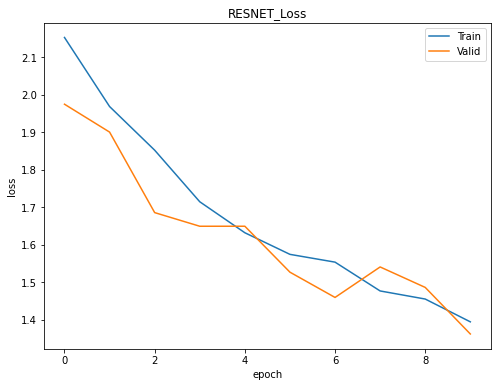

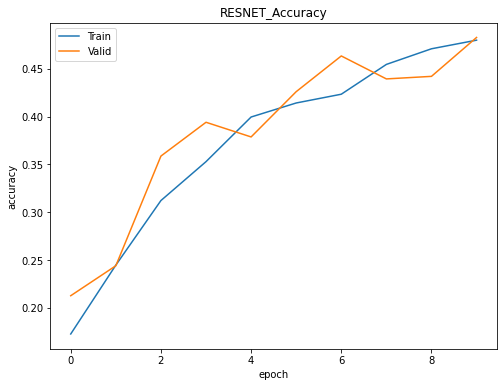

In [32]:
print("=" * 30, "RESNET 모델", "=" * 30)
img_shape = train_X[0].shape
model_resnet = build_resnet(img_shape)
run_model(model_resnet, train_X, train_y, test_X, test_y)